In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re


In [5]:
data = {
    'tweet': [
        "I love the new design of your website!",
        "Worst service ever. I'm never coming back.",
        "Just okay... nothing special.",
        "This is the best day of my life :)",
        "I hate waiting in long lines.",
        "The food was amazing and service was excellent!",
        "I’m not sure how I feel about this product.",
        "Absolutely terrible experience.",
        "Feeling blessed and thankful.",
        "Could have been better, but not bad."
    ]
}

df = pd.DataFrame(data)
df.head()


,tweet
0,I love the new design of your website!
1,Worst service ever. I'm never coming back.
2,Just okay... nothing special.
3,This is the best day of my life :)
4,I hate waiting in long lines.


In [6]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\\S+|www\\S+|https\\S+', '', tweet)
    tweet = re.sub(r'[^A-Za-z\\s]', '', tweet)
    tweet = tweet.lower()
    return tweet

df['clean_tweet'] = df['tweet'].apply(clean_tweet)


In [7]:
df['polarity'] = df['clean_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

def get_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(get_sentiment)
df[['tweet', 'clean_tweet', 'polarity', 'sentiment']]


,tweet,clean_tweet,polarity,sentiment
0,I love the new design of your website!,ilovethenewdesignofyourwebsite,0.0,Neutral
1,Worst service ever. I'm never coming back.,worstserviceeverimnevercomingback,0.0,Neutral
2,Just okay... nothing special.,justokaynothingspecial,0.0,Neutral
3,This is the best day of my life :),thisisthebestdayofmylife,0.0,Neutral
4,I hate waiting in long lines.,ihatewaitinginlonglines,0.0,Neutral
5,The food was amazing and service was excellent!,thefoodwasamazingandservicewasexcellent,0.0,Neutral
6,I’m not sure how I feel about this product.,imnotsurehowifeelaboutthisproduct,0.0,Neutral
7,Absolutely terrible experience.,absolutelyterribleexperience,0.0,Neutral
8,Feeling blessed and thankful.,feelingblessedandthankful,0.0,Neutral
9,"Could have been better, but not bad.",couldhavebeenbetterbutnotbad,0.0,Neutral


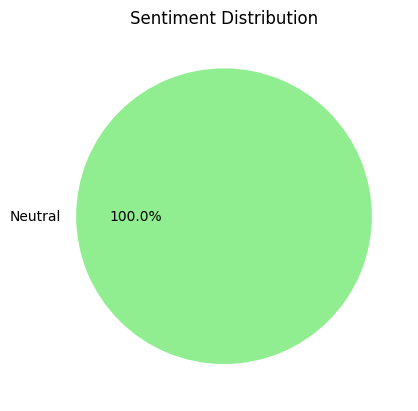

In [8]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','salmon','gold'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8104\2116713062.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


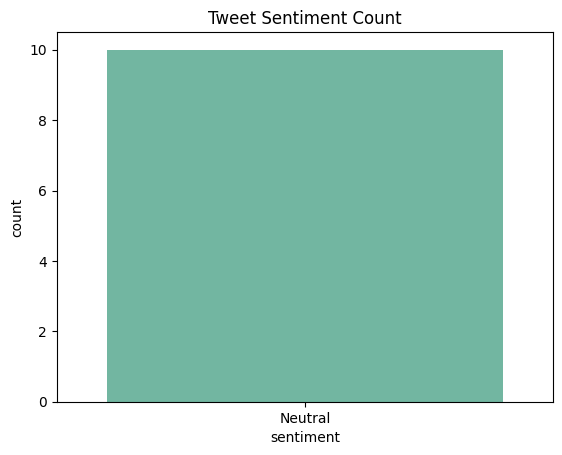

In [9]:
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Tweet Sentiment Count')
plt.show()


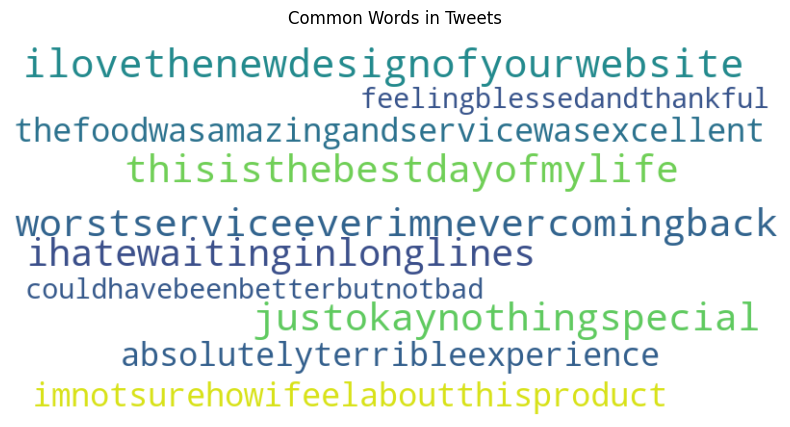

In [10]:
text = " ".join(df['clean_tweet'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Tweets')
plt.show()


- Tweets were categorized as positive, negative, or neutral using TextBlob.
- Bar and pie charts show sentiment spread.
- Word cloud displays most common words.
